
# K-vecinos más cercanos (KNN)
## Datos de clientes bancarios: 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

clientes = pd.read_csv("pelis.csv")
clientes

,edad,repeticiones,fantasia,terror,misterio,drama,likee
0,15,44,1,0,0,1,1
1,15,24,0,1,0,1,1
2,15,30,1,0,0,0,1
3,16,70,0,1,1,0,1
4,16,55,0,0,0,0,0
5,17,15,1,0,0,0,0
6,17,73,0,1,0,0,1
7,18,14,1,1,0,1,1
8,18,53,1,1,0,1,1
9,18,29,1,0,0,0,1


# Fantasia , Terror , Misterio , Drama

In [24]:
fantasia1 = clientes[clientes["fantasia"]==1]
fantasia0 = clientes[clientes["fantasia"]==0]
terror1 = clientes[clientes["terror"]==1]
terror0 = clientes[clientes["terror"]==0]
misterio1 = clientes[clientes["misterio"]==1]
misterio0 = clientes[clientes["misterio"]==0]
drama1 = clientes[clientes["drama"]==1]
drama0 = clientes[clientes["drama"]==0]

# Gráfica: peliculas


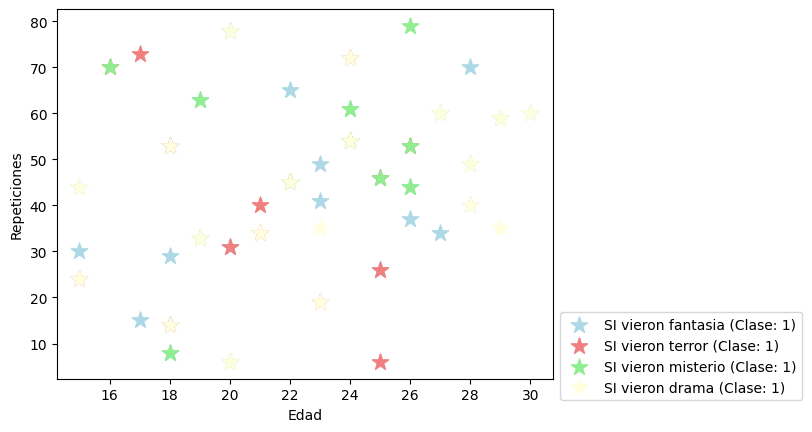

In [25]:
plt.scatter(fantasia1["edad"], fantasia1["repeticiones"],
            marker="*", s=150, color="lightblue",
            label="SI vieron fantasia (Clase: 1)")


plt.scatter(terror1["edad"], terror1["repeticiones"],
            marker="*", s=150, color="lightcoral", 
            label="SI vieron terror (Clase: 1)")


plt.scatter(misterio1["edad"], misterio1["repeticiones"],
            marker="*", s=150, color="lightgreen", 
            label="SI vieron misterio (Clase: 1)")


plt.scatter(drama1["edad"], drama1["repeticiones"],
            marker="*", s=150, color="lightyellow",
            label="SI vieron drama (Clase: 1)")



plt.ylabel("Repeticiones")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

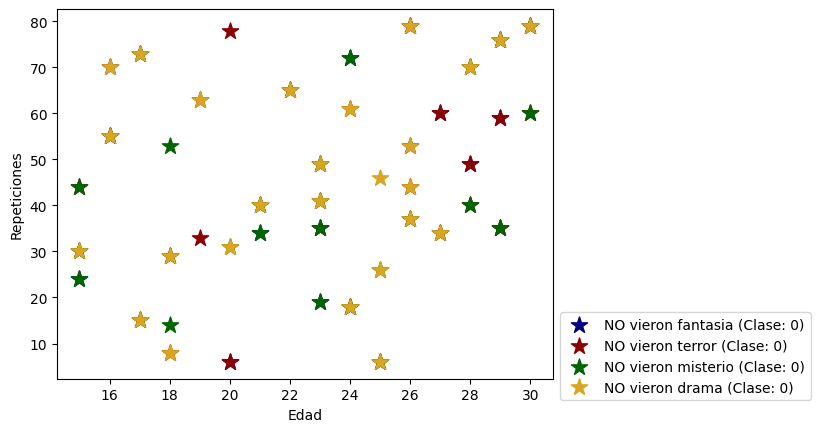

In [26]:


plt.scatter(fantasia0["edad"], fantasia0["repeticiones"],
            marker="*", s=150, color="navy",
            label="NO vieron fantasia (Clase: 0)")



plt.scatter(terror0["edad"], terror0["repeticiones"],
            marker="*", s=150, color="darkred", 
            label="NO vieron terror (Clase: 0)")



plt.scatter(misterio0["edad"], misterio0["repeticiones"],
            marker="*", s=150, color="darkgreen", 
            label="NO vieron misterio (Clase: 0)")


plt.scatter(drama0["edad"], drama0["repeticiones"],
            marker="*", s=150, color="goldenrod",
            label="NO vieron drama (Clase: 0)")


plt.ylabel("Repeticiones")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

# Preparación de los datos (Escalar)

In [27]:
datos = clientes[["edad", "fantasia", "terror", "misterio", "drama"]]
clase = clientes["likee"]

escalador = preprocessing.MinMaxScaler()

datos = escalador.fit_transform(datos)

# Creación del Modelo KNN
## Valor de K

In [28]:
clasificador = KNeighborsClassifier(n_neighbors=2)

clasificador.fit(datos, clase)

KNeighborsClassifier(n_neighbors=2)

# Nuevo Solicitante (Clasificación)

Clase: [0]
Probabilidades por clase [[0.5 0.5]]
Al nuevo solicitante no le gustaría la película.


c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


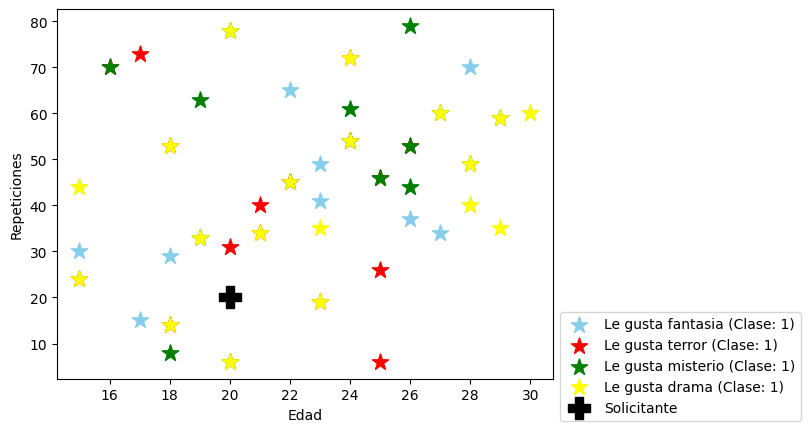

In [29]:
edad = 20
fantasia = 0
terror = 0
misterio = 1
drama = 0

#Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[edad, fantasia, terror, misterio, drama]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",
      clasificador.predict_proba(solicitante))


resultado = clasificador.predict(solicitante)

if resultado == 1:
    print("Al nuevo solicitante le gustaría la película.")
else:
    print("Al nuevo solicitante no le gustaría la película.")

#Código para graficar
plt.scatter(fantasia1["edad"], fantasia1["repeticiones"],
            marker="*", s=150, color="skyblue",
            label="Le gusta fantasia (Clase: 1)")

plt.scatter(terror1["edad"], terror1["repeticiones"],
            marker="*", s=150, color="red", 
            label="Le gusta terror (Clase: 1)")

plt.scatter(misterio1["edad"], misterio1["repeticiones"],
            marker="*", s=150, color="green", 
            label="Le gusta misterio (Clase: 1)")

plt.scatter(drama1["edad"], drama1["repeticiones"],
            marker="*", s=150, color="yellow",
            label="Le gusta drama (Clase: 1)")

plt.scatter(edad,edad, marker="P", s=250, color="black", label="Solicitante") 
plt.ylabel("Repeticiones")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

In [30]:
import pandas as pd

# Leer los datos del archivo CSV
datos = pd.read_csv("pelis.csv")

# Filtrar las filas desde 35 hasta 43
tabla = datos.iloc[10:22]

# Seleccionar las columnas relevantes
columnas_relevantes = ["fantasia", "terror", "misterio", "drama"]

# Cambiar los valores 1 y 0 a "Sí" y "No"
tabla[columnas_relevantes] = tabla[columnas_relevantes].replace({1: "Sí", 0: "No"})

# Mostrar la tabla
print(tabla)


    edad  repeticiones fantasia terror misterio drama  likee
10    18             8       Sí     No       Sí    No      0
11    19            63       Sí     No       Sí    No      1
12    19            33       Sí     No       Sí    Sí      1
13    20            78       Sí     No       Sí    Sí      1
14    20            31       Sí     Sí       No    No      1
15    20             6       No     No       Sí    Sí      1
16    21            34       No     Sí       No    Sí      1
17    21            40       No     Sí       No    No      0
18    22            65       Sí     No       No    No      1
19    22            45       Sí     Sí       Sí    Sí      1
20    23            35       No     No       No    Sí      0
21    23            49       Sí     No       No    No      1


C:\Users\Bartolomeo\AppData\Local\Temp\ipykernel_15916\257936828.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla[columnas_relevantes] = tabla[columnas_relevantes].replace({1: "Sí", 0: "No"})
